In [1]:
# 基本モジュール
import pandas as pd
import numpy as np

# 可視化モジュール
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 分析モジュール
from sklearn import linear_model

In [2]:
df = pd.read_csv('住宅情報.csv',thousands=',')
df.head()

,price,tsubo,tsubo_su,kenpei,building,age,birth,area
0,47400000,563000,44.69,0.834,482000,30,1986,A
1,60300000,694000,41.74,0.759,518000,36,1980,A
2,53700000,744000,42.89,0.955,384000,38,1978,A
3,29300000,613000,37.87,0.892,440000,42,1974,C
4,56200000,717000,38.87,1.005,504000,39,1977,A


In [3]:
# df.info()

In [4]:
# 量的変数の基本統計量
round(df.describe(),0)

,price,tsubo,tsubo_su,kenpei,building,age,birth
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,49698200.0,647582.0,40.0,1.0,450258.0,40.0,1976.0
std,8426389.0,80350.0,5.0,0.0,39636.0,4.0,4.0
min,23700000.0,397000.0,28.0,1.0,336000.0,29.0,1964.0
25%,44100000.0,592750.0,37.0,1.0,424000.0,37.0,1973.0
50%,49350000.0,648000.0,40.0,1.0,451000.0,40.0,1976.0
75%,55525000.0,704250.0,44.0,1.0,478000.0,43.0,1979.0
max,71000000.0,889000.0,61.0,1.0,542000.0,52.0,1987.0


In [5]:
# 量的変数と質的変数の基本統計量
df.describe(include = 'all')

,price,tsubo,tsubo_su,kenpei,building,age,birth,area
count,5.000000e+02,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279
mean,4.969820e+07,647582.00000,40.418260,0.852584,450258.000000,40.156000,1975.844000,NaN
std,8.426389e+06,80350.10613,5.168393,0.050790,39636.214438,4.000459,4.000459,NaN
min,2.370000e+07,397000.00000,28.310000,0.674000,336000.000000,29.000000,1964.000000,NaN
25%,4.410000e+07,592750.00000,36.687500,0.818000,424000.000000,37.000000,1973.000000,NaN
50%,4.935000e+07,648000.00000,40.450000,0.850000,451000.000000,40.000000,1976.000000,NaN
75%,5.552500e+07,704250.00000,43.760000,0.886000,478000.000000,43.000000,1979.000000,NaN


Text(0,0.5,'Count')

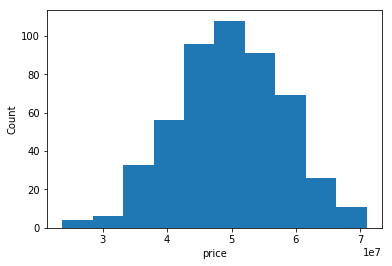

In [6]:
# priceのヒストグラムを作る
plt.hist(df['price'])

# x軸とy軸のラベルをつける
plt.xlabel('price')
plt.ylabel('Count')

In [7]:
df['price'].describe()

count    5.000000e+02
mean     4.969820e+07
std      8.426389e+06
min      2.370000e+07
25%      4.410000e+07
50%      4.935000e+07
75%      5.552500e+07
max      7.100000e+07
Name: price, dtype: float64

In [8]:
df['price'].median()

49350000.0

In [9]:
df['price'].var()

71004024809619.23

In [10]:
# 層別解析
df.groupby(['area']).mean()[['price']]

,price
area,
A,5.477563e+07
B,4.345238e+07
C,4.322917e+07
D,4.309024e+07


In [11]:
# 相関係数
corr_mat = df.corr(method='pearson')
corr_mat

,price,tsubo,tsubo_su,kenpei,building,age,birth
price,1.000000,0.452456,0.364636,0.070412,0.055201,0.099212,-0.099212
tsubo,0.452456,1.000000,-0.041617,0.062542,-0.011701,0.069163,-0.069163
tsubo_su,0.364636,-0.041617,1.000000,-0.018341,-0.052908,-0.023773,0.023773
kenpei,0.070412,0.062542,-0.018341,1.000000,-0.043538,0.015361,-0.015361
building,0.055201,-0.011701,-0.052908,-0.043538,1.000000,0.072063,-0.072063
age,0.099212,0.069163,-0.023773,0.015361,0.072063,1.000000,-1.000000
birth,-0.099212,-0.069163,0.023773,-0.015361,-0.072063,-1.000000,1.000000


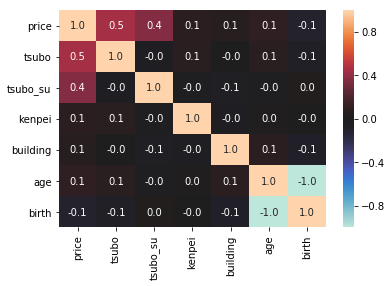

In [12]:
sns.heatmap(corr_mat,
vmin=-1.0,
vmax=1.0,
center=0,
annot=True, # True:表に値を表示
fmt='.1f',
xticklabels=corr_mat.columns.values,
yticklabels=corr_mat.columns.values
)
plt.show()

Text(0,0.5,'price')

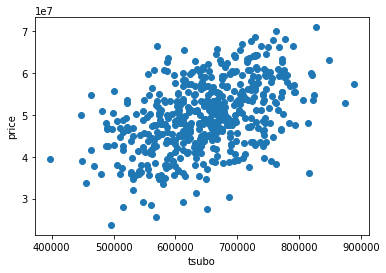

In [13]:
# 散布図をプロットする
plt.scatter(df['tsubo'],df['price'])

plt.xlabel('tsubo')
plt.ylabel('price')

Text(0,0.5,'price')

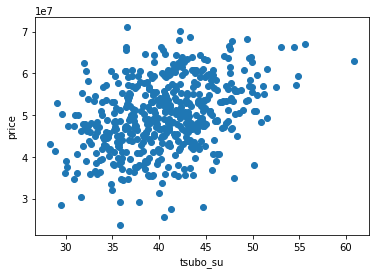

In [14]:
# 散布図をプロットする
plt.scatter(df['tsubo_su'],df['price'])

plt.xlabel('tsubo_su')
plt.ylabel('price')

In [15]:
# Step1：データから目的変数と説明変数(複数列でも可)を選ぶ
# Step2：使いたい予測モデルを選んで、必要なモジュールをインポートする(今回は回帰モデルを選ぶ)
# Step3：モデルのクラスからモデルインスタンスを生成する
# Step4：生成したインスタンスに目的変数と説明変数を指定する(fitさせる)

In [17]:
reg = linear_model.LinearRegression()

In [18]:
# 説明変数を定義する
X = df[['tsubo']]
# 目的変数を定義する
Y = df[['price']]

In [19]:
# モデル作成
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print('回帰係数は',reg.coef_,'\n')
print('切片は',reg.intercept_)

回帰係数は [[47.44945887]] 

切片は [18970784.52832152]


In [21]:
print('作成されたモデル：priceの予測値 = {0:.1f}×tsuboの値 + {1:.1f}'.format(reg.coef_[0][0],reg.intercept_[0]))

作成されたモデル：priceの予測値 = 47.4×tsuboの値 + 18970784.5


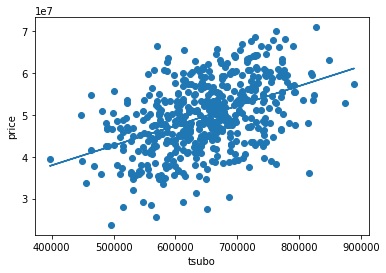

In [22]:
# 散布図をプロットする
plt.scatter(df['tsubo'],df['price'])
plt.xlabel('tsubo')
plt.ylabel('price')
#　回帰直線をプロットする
plt.plot(X,reg.predict(X))

In [23]:
# 決定係数のとりあえずの目安としては 0.2以下：低い　0.2〜0.5：ふつう　0.5以上：高い
# 決定係数を出力
reg.score(X,Y)

0.204716321979326

In [24]:
reg2 = linear_model.LinearRegression()

In [25]:
# 説明変数を定義する
X2 = df[['tsubo_su']]
# 目的変数を定義する
Y = df[['price']]

In [26]:
# モデル作成
reg2.fit(X2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print('回帰係数は',reg2.coef_,'\n')
print('切片は',reg2.intercept_)

回帰係数は [[594491.76903528]] 

切片は [25669877.11127199]


In [28]:
print('作成されたモデル：priceの予測値 = {0:.1f}×tsuboの値 + {1:.1f}'.format(reg2.coef_[0][0],reg2.intercept_[0]))

作成されたモデル：priceの予測値 = 594491.8×tsuboの値 + 25669877.1


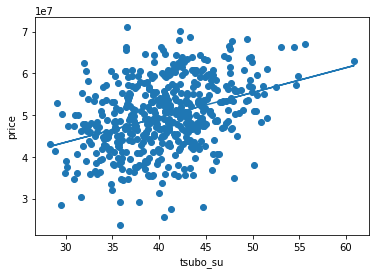

In [29]:
# 散布図をプロットする
plt.scatter(df['tsubo_su'],df['price'])
plt.xlabel('tsubo_su')
plt.ylabel('price')
#　回帰直線をプロットする
plt.plot(X2,reg2.predict(X2))

In [30]:
reg2.score(X2,Y)

0.1329596514544935

In [36]:
reg3 = linear_model.LinearRegression()
# 目的変数（予測対象）のデータを取り出す
Y = df[['price']]
# 説明変数（予測に使う変数）のデータを取り出す
X3 = df[['tsubo','tsubo_su']]

In [38]:
reg3.fit(X3,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print('回帰係数は',reg3.coef_,'\n') #アンダーバー(_)に注意、忘れないように！
print('切片は',reg3.intercept_)

回帰係数は [[4.91259738e+01 6.26276201e+05]] 

切片は [-7427890.70904541]


Text(0,0.5,'yosoku')

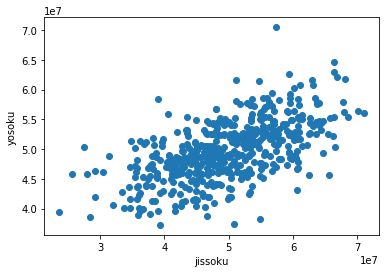

In [40]:
#　実測値と予測値の散布図をプロットする
plt.scatter(Y,reg3.predict(X3))

# 散布図をプロットする
plt.xlabel('jissoku')
plt.ylabel('yosoku')

In [41]:
reg3.score(X3,Y)

0.3520178148928559